In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container



In [2]:
Num_Points = 0
Title     = 'Synthetic Regression LIME 2'
Sampling  = 'std_t'
N_samples = 2000


In [3]:
# Load Forrester model

Reg_Data = BB_Model(dataset = 'Regression_2', Feature_Counts=[16,12])

#Reg_Data.df().head()

In [4]:
Reg_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6971933829474175


MLPRegressor(random_state=RandomState(MT19937) at 0x26824959840)

In [5]:
Reg_Data.Random_Forest()

0.5919510862170715


RandomForestRegressor(random_state=RandomState(MT19937) at 0x26824959840)

In [6]:
Reg_Data.GP()

-0.03600576490930196


GaussianProcessRegressor()

In [7]:
print(Reg_Data.get_features())

['Passive_0', 'Passive_1', 'Active_2', 'Active_3', 'Active_4', 'Active_5', 'Active_6', 'Active_7']


In [8]:
#Default settings
from LIME_2.lime_2 import LIME_Model

X_train, X_test, y_train, y_test = Reg_Data.get_TT_data()

#Initializing the explainer object
LIME_Exp = LIME_Model(bbox_model           = Reg_Data.get_Random_Forest(),
                      train_data           = X_train,
                      feature_names        = Reg_Data.get_features(),
                      categorical_features = Reg_Data.get_catagorical(),
                      mode                 = Reg_Data.get_mode(),
                      sampling             = Sampling)


In [9]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [ 1.19928589  0.87624732  4.40616412  8.76114478  0.21863674  6.61660983
  4.74081188 15.32968134]
Std 0:  [5.14496258 4.74971929 2.47531135 1.10115865 1.4503958  3.51032788
 3.89209682 4.03511308]


In [10]:
# Generate explantion data for Random Forest

Reg_Stats = Feature_Statistics(feature_names = Reg_Data.get_features(),
                               mode          = Reg_Data.get_mode(),
                               uncert_pr     = False)

if Num_Points > X_test.shape[0]: Num_Points = X_test.shape[0]

elif Num_Points == 0:            Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
#    data_row  = np.array([0.4])

#    print('data row ',data_row)
    
    LIME_Exp.explain(X_init                 = data_row.reshape(1, -1),
                     sample_around_instance = True,
                     bounds                 = 1,
                     LHC_strength           = 1,
                     Student_T_DF           = 1,
                     N_samples              = N_samples)
       
    f_predict = Reg_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = LIME_Exp.exp_predict(data_row.reshape(1, -1))
    e_predict = np.array(e_predict).ravel()
       
    print(f_predict, e_predict)
    
    scores = LIME_Exp.get_LIME_scores()
    
    Reg_Stats.Add_Sample(sample_scores = scores,
                         outcome       = y_test[test_instance],
                         X_row         = data_row.reshape(1, -1),
                         f_prediction  = f_predict,
                         e_prediction  = e_predict.ravel(),
                         feopt         = None,
                         model         = LIME_Exp.get_exp_model())


INSTANCE:  0
[-27.47854215] [-15.02485912]
INSTANCE:  1
[-17.45385655] [-9.49953582]
INSTANCE:  2
[54.14641582] [49.6039892]
INSTANCE:  3
[-25.59858318] [-7.23662866]
INSTANCE:  4
[-26.98742093] [-13.4063908]
INSTANCE:  5
[7.71734168] [13.02466155]
INSTANCE:  6
[-47.63215044] [-31.53651642]
INSTANCE:  7
[41.90457903] [51.18906372]
INSTANCE:  8
[-67.58817455] [-44.62731678]
INSTANCE:  9
[42.36608037] [43.3351342]
INSTANCE:  10
[28.79812306] [28.75781584]
INSTANCE:  11
[53.03701931] [54.10393178]
INSTANCE:  12
[30.97919481] [28.83420951]
INSTANCE:  13
[-31.45916301] [-9.63145621]
INSTANCE:  14
[54.85642365] [46.71010734]
INSTANCE:  15
[20.47429831] [13.9116254]
INSTANCE:  16
[-12.13247288] [-9.63269359]
INSTANCE:  17
[21.1047088] [24.21296525]
INSTANCE:  18
[38.22171528] [34.50565123]
INSTANCE:  19
[83.74620602] [71.76259928]
INSTANCE:  20
[56.35285616] [37.82531209]
INSTANCE:  21
[-4.6794028] [15.20114519]
INSTANCE:  22
[53.87601132] [61.08277782]
INSTANCE:  23
[-63.7939463] [-39.513398

In [11]:
import matplotlib.pyplot as plt


In [12]:
print(f_predict)
print(e_predict)


[-29.60509478]
[-12.08835999]


In [13]:
Reg_Stats.Feature_Counts(max_features=20, scaled=True, threshold=0.05)


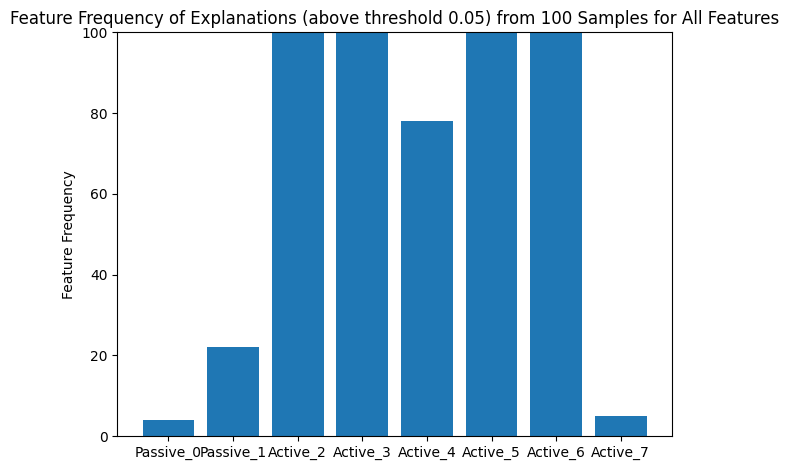

In [14]:
Reg_Stats.Frequency_Plot()


In [15]:
Reg_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           28.700053040925678  :  625.8725423947947  :  121.79763246307556
y - exp(x):          31.671895612698172  :  541.3675615210745  :  133.7812392122347
BB(x) - exp(x):      11.440337283501627  :  90.24272913363205  :  58.46891953984222


In [16]:
Reg_Stats.Jaccard_Values()

Mean Jaccard Similarity:  0.8421067821067821
Mean Jaccard Distance:    0.15789321789321792


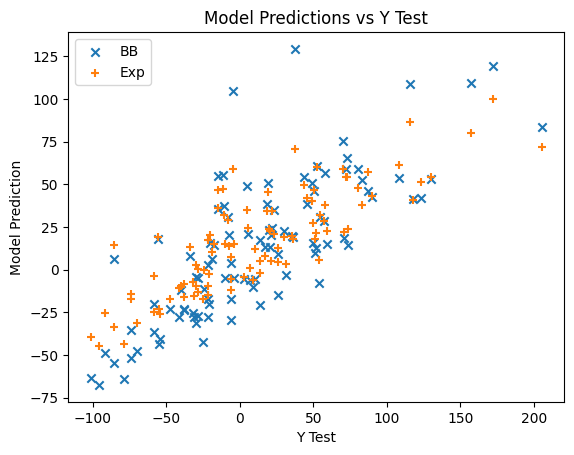

In [17]:
Reg_Stats.Reg_Fidelity_Graph()

top_features True
top_features (100, 8)


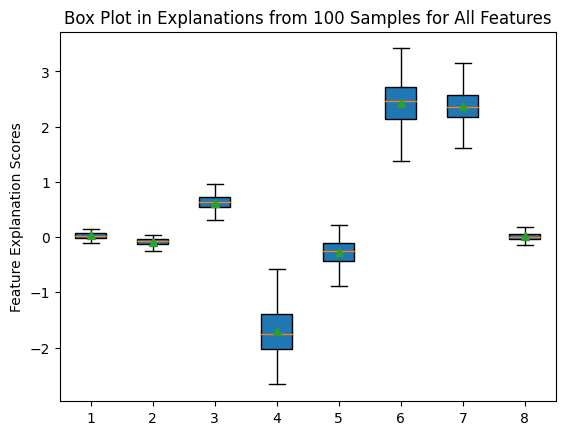

1 -      Passive_0
2 -      Passive_1
3 -      Active_2
4 -      Active_3
5 -      Active_4
6 -      Active_5
7 -      Active_6
8 -      Active_7


In [18]:
Reg_Stats.Box_Plot()


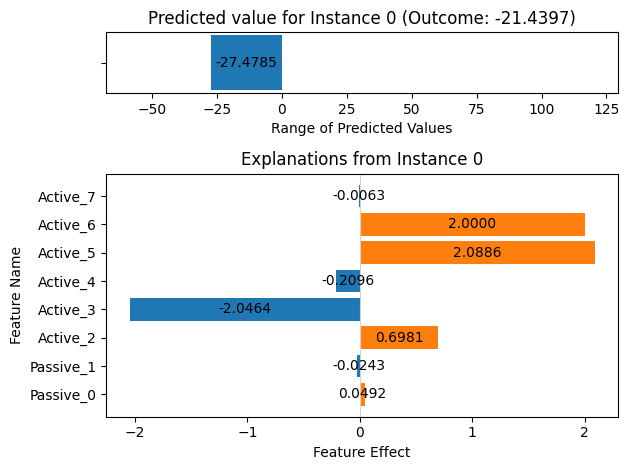

In [19]:
Reg_Stats.View_Explanation(instance = 0)

In [20]:
scores = LIME_Exp.permutation_importance()
    


In [21]:
scores_d1 = LIME_Exp.del_1_rel()

print(scores_d1)

[5.56938062e-03 6.27312673e-04 7.56589872e-04 4.90296951e+00
 4.61951819e-04 3.08949960e+00 1.05984371e-04 9.67455379e-06]


In [22]:
scores_d2 = LIME_Exp.del_2_rel()

print(scores_d2)

[7.15331678e-03 1.70345743e-02 2.68545491e-01 2.37103546e-01
 1.44763540e-04 5.93082813e+00 1.53918862e+00 1.55508648e-06]


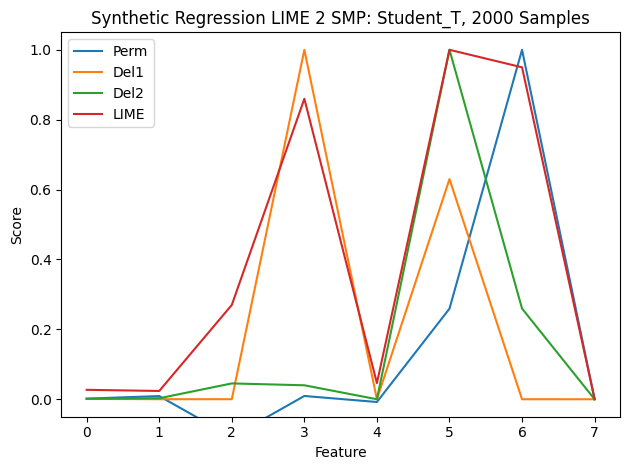

In [23]:
LIME_Exp.plot_scores(Title)